In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# https://www.kaggle.com/datasets/CooperUnion/cardataset
df = pd.read_csv("../../dados/CarFeatures_Predictions.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP_pred,city_mpg_pred,highway_mpg_pred
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,59488.641062,17.446454,26.500792
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,47252.921464,17.524776,26.801317
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,37322.190289,17.512119,26.750428
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,36317.775649,17.741169,26.688855
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,39477.079258,17.736707,26.630921


### Comparar preços reais vs previstos

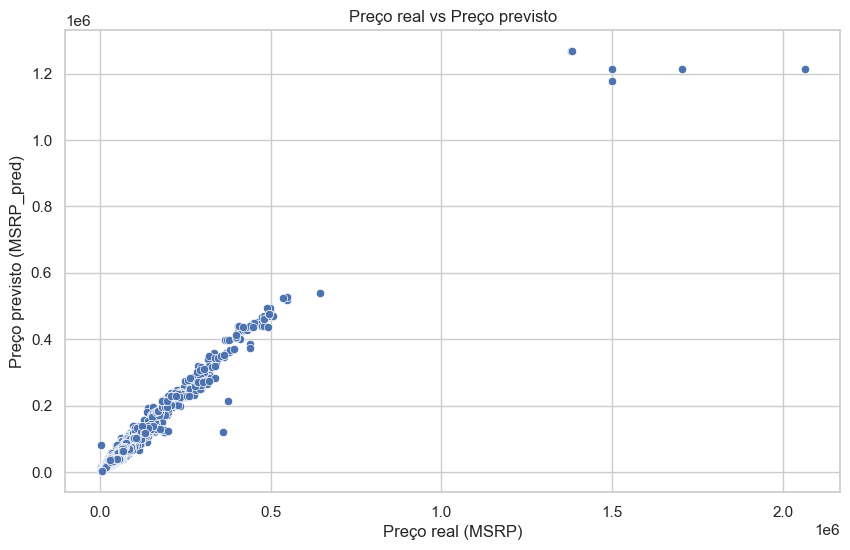

In [3]:
sns.scatterplot(x="MSRP", y="MSRP_pred", data=df)
plt.title("Preço real vs Preço previsto")
plt.xlabel("Preço real (MSRP)")
plt.ylabel("Preço previsto (MSRP_pred)")
plt.show()

### Distribuição de preços previstos

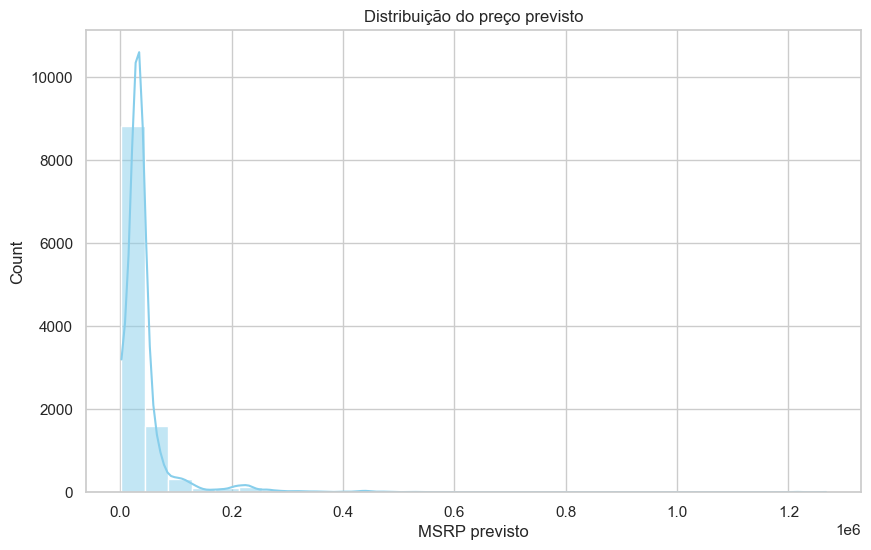

In [4]:
sns.histplot(df["MSRP_pred"], bins=30, kde=True, color="skyblue")
plt.title("Distribuição do preço previsto")
plt.xlabel("MSRP previsto")
plt.show()

### Consumo cidade vs estrada por marca

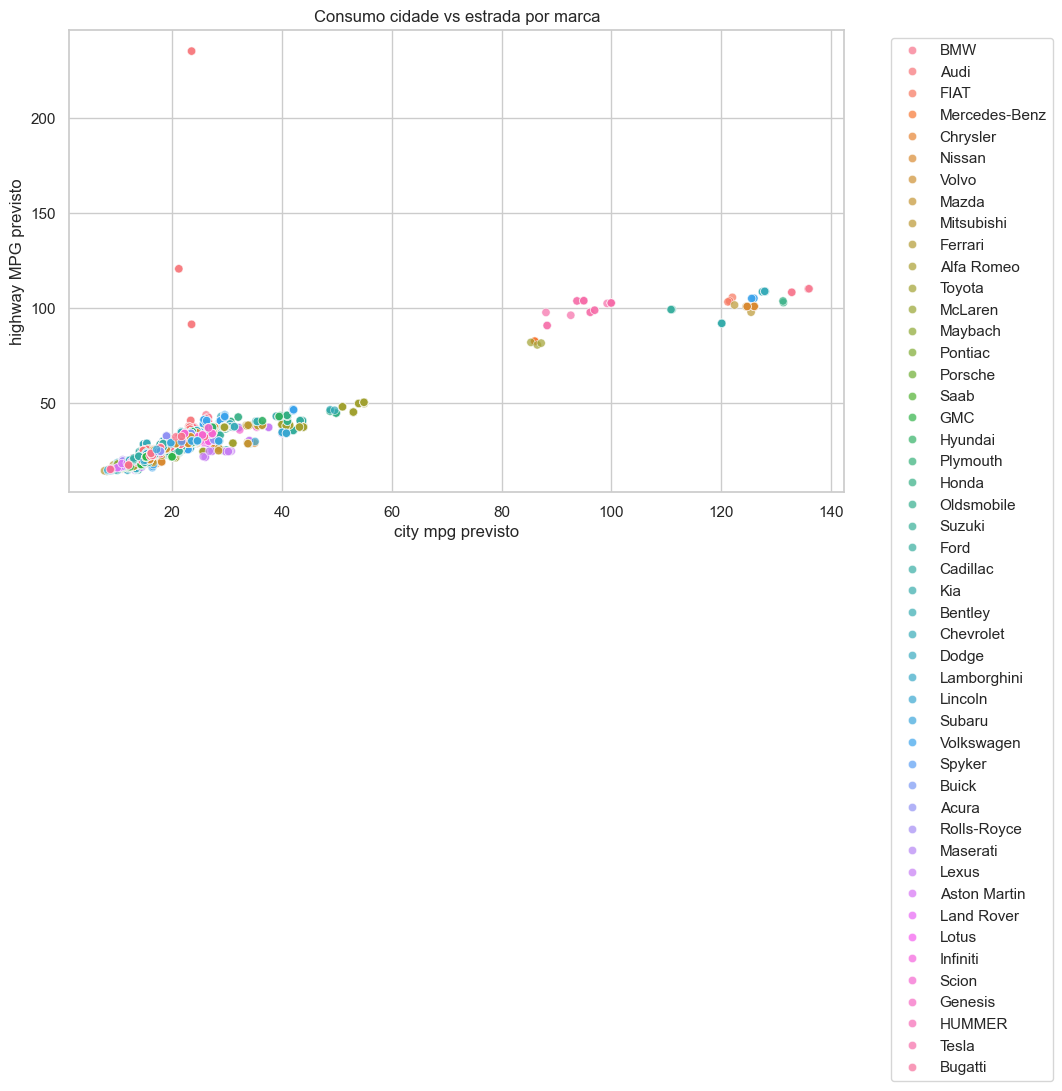

In [5]:
sns.scatterplot(x="city_mpg_pred", y="highway_mpg_pred", hue="Make", data=df, alpha=0.7)
plt.title("Consumo cidade vs estrada por marca")
plt.xlabel("city mpg previsto")
plt.ylabel("highway MPG previsto")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Preço vs Consumo (cidade)

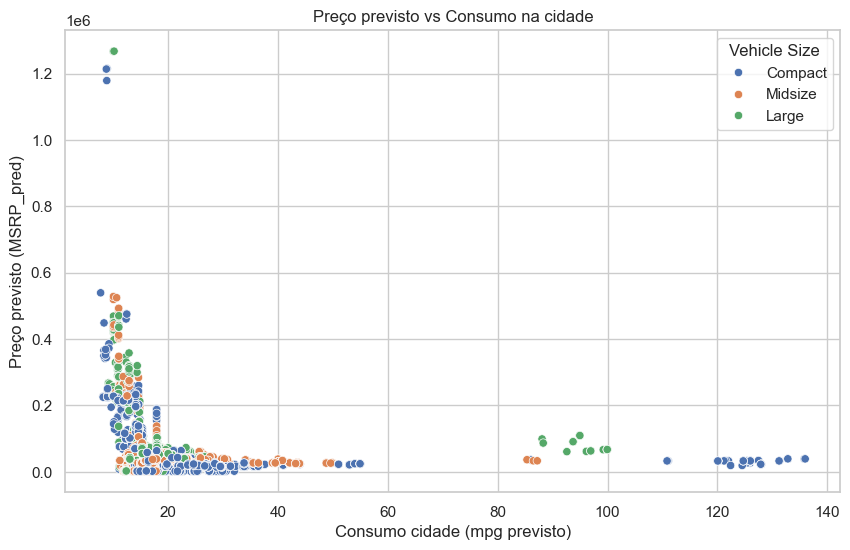

In [6]:
sns.scatterplot(
    x="city_mpg_pred", 
    y="MSRP_pred", 
    hue="Vehicle Size", 
    data=df
)
plt.title("Preço previsto vs Consumo na cidade")
plt.xlabel("Consumo cidade (mpg previsto)")
plt.ylabel("Preço previsto (MSRP_pred)")
plt.show()

### Top 10 modelos mais caros

C:\Users\exhar\AppData\Local\Temp\ipykernel_26528\982206607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


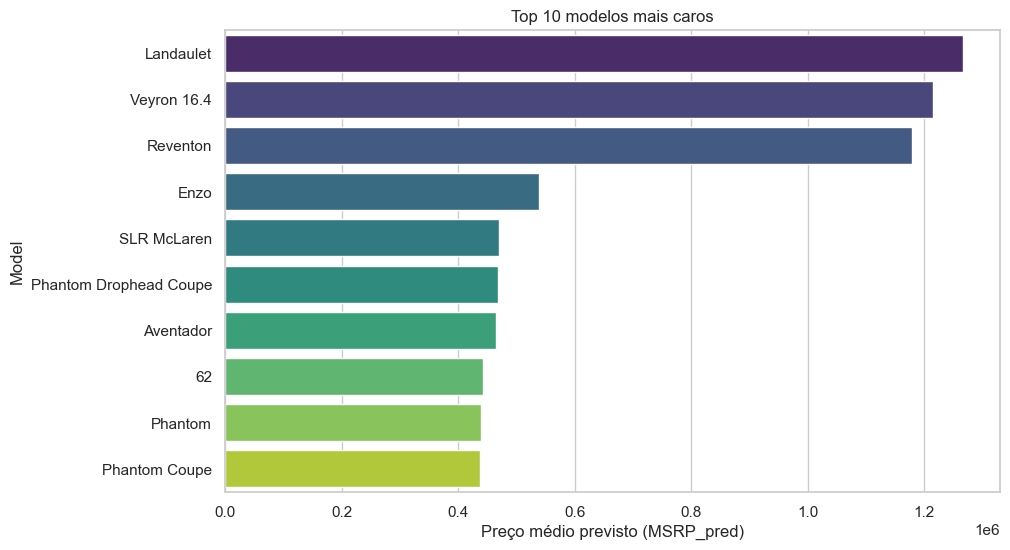

In [7]:
top10 = df.groupby("Model")["MSRP_pred"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title("Top 10 modelos mais caros")
plt.xlabel("Preço médio previsto (MSRP_pred)")
plt.show()

### Boxplot de consumo por Vehicle Size

C:\Users\exhar\AppData\Local\Temp\ipykernel_26528\146559659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


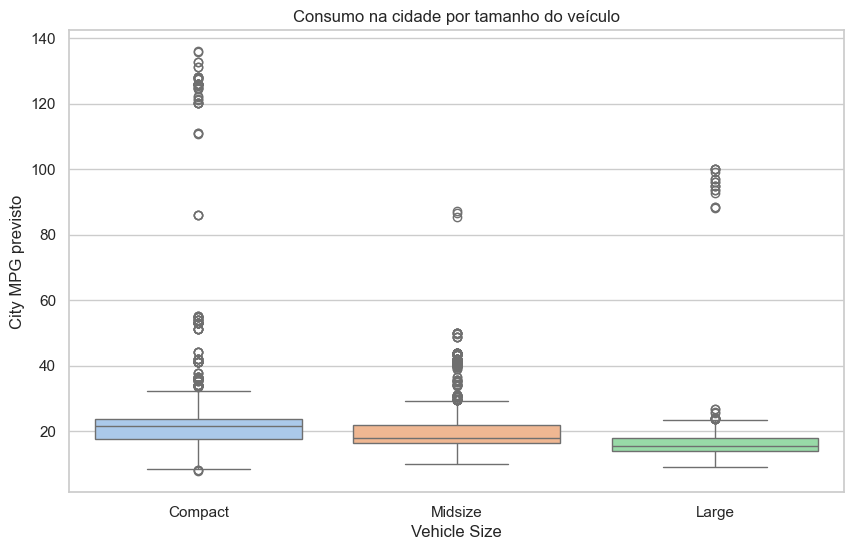

In [8]:
sns.boxplot(
    x="Vehicle Size", 
    y="city_mpg_pred", 
    data=df, 
    palette="pastel"
)
plt.title("Consumo na cidade por tamanho do veículo")
plt.xlabel("Vehicle Size")
plt.ylabel("City MPG previsto")
plt.show()